# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [93]:
pip install citipy

In [188]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import datetime


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [189]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [190]:
#Create a list for all of the variables in the CSV file
cities_list= []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [191]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#retrieve the data from the CSV file
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cities_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:  #each set is 50 cities long, so we will need to make sets of 50
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping..")

Processing Record 1 of Set 1 : provideniya
City not found. Skipping..
Processing Record 2 of Set 1 : punta arenas
Processing Record 3 of Set 1 : mataura
Processing Record 4 of Set 1 : mahebourg
Processing Record 5 of Set 1 : arco
Processing Record 6 of Set 1 : kieta
Processing Record 7 of Set 1 : ushuaia
City not found. Skipping..
Processing Record 8 of Set 1 : pevek
Processing Record 9 of Set 1 : nyimba
Processing Record 10 of Set 1 : qaanaaq
City not found. Skipping..
Processing Record 11 of Set 1 : oktyabrskoye
Processing Record 12 of Set 1 : north bend
Processing Record 13 of Set 1 : teguise
Processing Record 14 of Set 1 : saint-philippe
Processing Record 15 of Set 1 : rikitea
Processing Record 16 of Set 1 : hofn
Processing Record 17 of Set 1 : yellowknife
Processing Record 18 of Set 1 : hilo
Processing Record 19 of Set 1 : anadyr
Processing Record 20 of Set 1 : tiksi
Processing Record 21 of Set 1 : barrow
Processing Record 22 of Set 1 : chokurdakh
Processing Record 23 of Set 1 : b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [192]:
city_weather=pd.DataFrame({
    "City":cities_list,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp (Celsius)":max_temp_list,
    "Humidity %":humidity_list,
    "Cloudiness %":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list
})

city_weather.head(10)

,City,Lat,Lng,Max Temp (Celsius),Humidity %,Cloudiness %,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,19.51,68,90,8.95,RU,1635373363
1,Punta Arenas,-53.1500,-70.9167,53.71,47,0,16.11,CL,1635373387
2,Mataura,-46.1927,168.8643,64.51,60,10,3.53,NZ,1635373338
3,Mahébourg,-20.4081,57.7000,72.25,83,40,3.44,MU,1635373397
4,Arco,45.9177,10.8867,52.18,84,0,4.27,IT,1635373397
5,Kieta,-6.2167,155.6333,82.33,78,41,3.78,PG,1635373398
6,Ushuaia,-54.8000,-68.3000,49.66,50,20,26.46,AR,1635373398
7,Pevek,69.7008,170.3133,9.19,92,100,11.25,RU,1635373398
8,Nyimba,-14.5566,30.8149,76.75,52,30,9.69,ZM,1635373399
9,Qaanaaq,77.4840,-69.3632,20.88,94,100,11.23,GL,1635373399


In [193]:
city_weather.describe()

,Lat,Lng,Max Temp (Celsius),Humidity %,Cloudiness %,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,19.736426,17.340082,59.577699,72.851211,52.953287,7.099048,1.635373e+09
std,33.240854,90.455828,21.531325,19.939823,39.641499,5.176500,7.565183e+01
min,-54.800000,-179.166700,-18.060000,10.000000,0.000000,0.000000,1.635373e+09
25%,-8.079475,-61.648500,44.672500,64.000000,10.000000,3.440000,1.635373e+09
50%,23.999250,20.225700,65.705000,77.000000,56.500000,5.870000,1.635373e+09
75%,46.909325,94.175025,76.780000,88.000000,94.750000,9.302500,1.635374e+09
max,78.218600,179.316700,94.570000,100.000000,100.000000,32.910000,1.635374e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [194]:
clean_city_weather=city_weather.loc[city_weather['Humidity %'] < 101]
clean_city_weather.sort_values(by=['Humidity %'], ascending=False)

#there are 0 cities with humidity over 100%

,City,Lat,Lng,Max Temp (Celsius),Humidity %,Cloudiness %,Wind Speed,Country,Date
126,Saskylakh,71.9167,114.0833,-7.35,100,100,2.95,RU,1635373430
369,Kajaani,64.2273,27.7285,32.05,100,90,6.91,FI,1635373498
342,Iberia,29.9502,-91.7507,72.97,100,75,8.05,US,1635373491
229,Thompson,55.7435,-97.8558,41.16,100,90,3.44,CA,1635373391
379,Eséka,3.6500,10.7667,72.01,100,87,1.23,CM,1635373502
...,...,...,...,...,...,...,...,...,...
433,Kidal,18.4411,1.4078,86.58,14,22,9.01,ML,1635373520
524,Moussoro,13.6408,16.4901,86.43,13,31,9.55,TD,1635373545
276,Sonoita,31.8500,-112.8333,76.53,12,0,14.67,MX,1635373473
431,Arlit,18.7369,7.3853,86.22,12,3,7.29,NE,1635373519


In [195]:
#  Get the indices of cities that have humidity over 100%.
clean_city_weather_over=city_weather.loc[city_weather['Humidity %'] > 100]
clean_city_weather_over.count()

#There are 0 cities with humidity over 100$%

City                  0
Lat                   0
Lng                   0
Max Temp (Celsius)    0
Humidity %            0
Cloudiness %          0
Wind Speed            0
Country               0
Date                  0
dtype: int64

In [211]:
# find outlier data

quartiles =city_weather.iloc[:,4].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(upperq)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

88.0
Values below 28.0 could be outliers.
Values above 124.0 could be outliers.


In [228]:
# # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_weather=city_weather.loc[(city_weather['Humidity %'] < upper_bound)]
clean_city_weather

,City,Lat,Lng,Max Temp (Celsius),Humidity %,Cloudiness %,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,19.51,68,90,8.95,RU,1635373363
1,Punta Arenas,-53.1500,-70.9167,53.71,47,0,16.11,CL,1635373387
2,Mataura,-46.1927,168.8643,64.51,60,10,3.53,NZ,1635373338
3,Mahébourg,-20.4081,57.7000,72.25,83,40,3.44,MU,1635373397
4,Arco,45.9177,10.8867,52.18,84,0,4.27,IT,1635373397
...,...,...,...,...,...,...,...,...,...
573,Kosh-Agach,50.0000,88.6667,24.89,74,39,1.70,RU,1635373558
574,Lovozero,68.0050,35.0117,11.53,95,27,4.36,RU,1635373559
575,Ferrol,43.4832,-8.2369,59.34,73,4,7.72,ES,1635373559
576,Abū Zabad,12.3500,29.2500,81.79,20,99,11.39,SD,1635373559


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

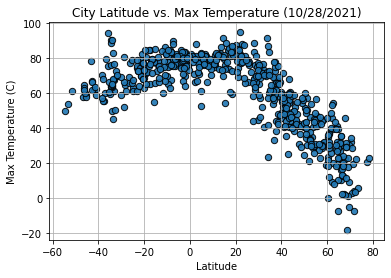

<Figure size 432x288 with 0 Axes>

In [242]:
today = datetime.datetime.today()
clean_city_weather.plot('Lat', 'Max Temp (Celsius)', kind = 'scatter',
                title = f"City Latitude vs. Max Temperature ({today.strftime('%m/%d/%Y')})",
                grid = True, s = 40, edgecolors = 'k', alpha = .9)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

plt.savefig('../output_data/lat_temp_plot.png')

## Latitude vs. Humidity Plot

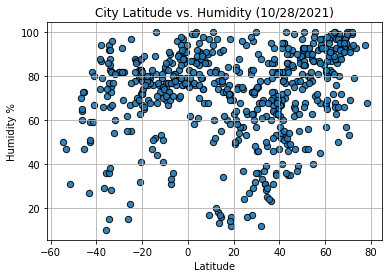

<Figure size 432x288 with 0 Axes>

In [243]:
today = datetime.datetime.today()
clean_city_weather.plot('Lat', 'Humidity %', kind = 'scatter',
                title = f"City Latitude vs. Humidity ({today.strftime('%m/%d/%Y')})",
                grid = True, s = 40, edgecolors = 'k', alpha = .9)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()
plt.savefig('../output_data/Lathumidityplot.pdf', dpi=300)
            

## Latitude vs. Cloudiness Plot

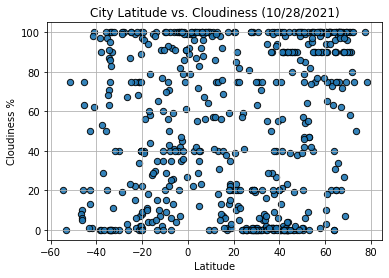

<Figure size 432x288 with 0 Axes>

In [244]:
today = datetime.datetime.today()
clean_city_weather.plot('Lat', 'Cloudiness %', kind = 'scatter',
                title = f"City Latitude vs. Cloudiness ({today.strftime('%m/%d/%Y')})",
                grid = True, s = 40, edgecolors = 'k', alpha = .9)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()
plt.savefig('../output_data/lat_cloudiness_plot')

## Latitude vs. Wind Speed Plot

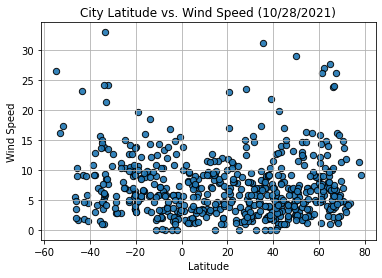

<Figure size 432x288 with 0 Axes>

In [255]:
today = datetime.datetime.today()
clean_city_weather.plot('Lat', 'Wind Speed', kind = 'scatter',
                title = f"City Latitude vs. Wind Speed ({today.strftime('%m/%d/%Y')})",
                grid = True, s = 40, edgecolors = 'k', alpha = .9)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig('../output_data/lat_windspeed_plot')

## Linear Regression

In [246]:
#create variables to distinguish northern and southern cities
northern_df=clean_city_weather.loc[clean_city_weather['Lat'] > 0]
southern_df=clean_city_weather.loc[clean_city_weather['Lat'] < 0]

southern_df.head()

,City,Lat,Lng,Max Temp (Celsius),Humidity %,Cloudiness %,Wind Speed,Country,Date
1,Punta Arenas,-53.1500,-70.9167,53.71,47,0,16.11,CL,1635373387
2,Mataura,-46.1927,168.8643,64.51,60,10,3.53,NZ,1635373338
3,Mahébourg,-20.4081,57.7000,72.25,83,40,3.44,MU,1635373397
5,Kieta,-6.2167,155.6333,82.33,78,41,3.78,PG,1635373398
6,Ushuaia,-54.8000,-68.3000,49.66,50,20,26.46,AR,1635373398


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.748438958695253


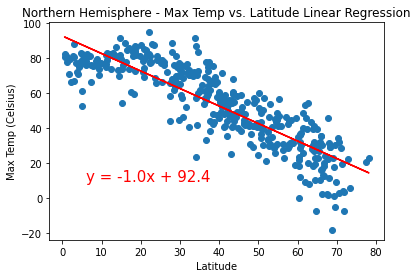

<Figure size 432x288 with 0 Axes>

In [247]:

x_axis=northern_df['Lat']
y_axis=northern_df['Max Temp (Celsius)']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../output_data/linregress_northern_maxtemp_plot')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3099977803186206


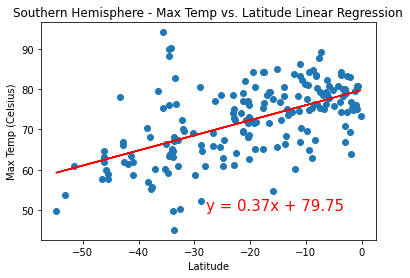

<Figure size 432x288 with 0 Axes>

In [248]:

x_axis=southern_df['Lat']
y_axis=southern_df['Max Temp (Celsius)']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-28,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../output_data/linregress_southern_maxtemp_plot')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06335113058930932


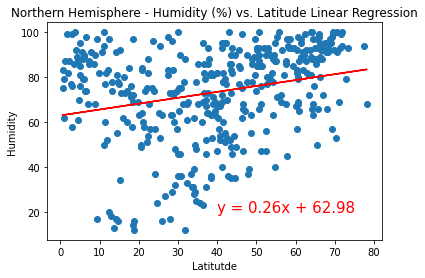

<Figure size 432x288 with 0 Axes>

In [249]:
x_axis=northern_df['Lat']
y_axis=northern_df['Humidity %']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitutde')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../output_data/linregress_northern_humid_plot')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10322916538797407


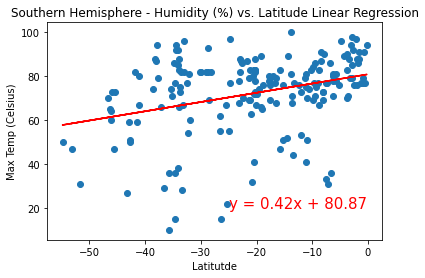

<Figure size 432x288 with 0 Axes>

In [250]:
x_axis=southern_df['Lat']
y_axis=southern_df['Humidity %']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitutde')
plt.ylabel('Max Temp (Celsius)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../output_data/linregress_southern_humid_plot')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.039789241665994436


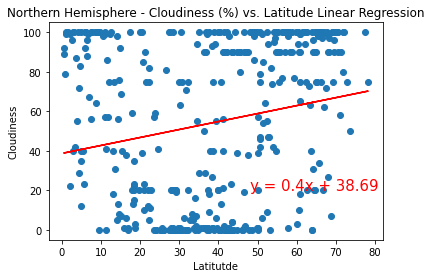

<Figure size 432x288 with 0 Axes>

In [251]:
x_axis=northern_df['Lat']
y_axis=northern_df['Cloudiness %']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(48,20),fontsize=15,color="red")
plt.xlabel('Latitutde')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../output_data/linregress_northern_cloudiness_plot')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.018876363687009342


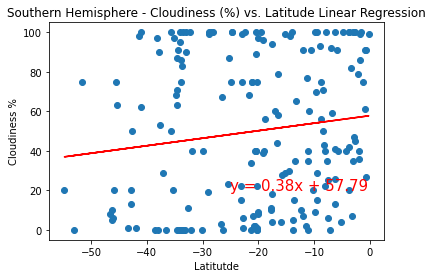

<Figure size 432x288 with 0 Axes>

In [252]:
x_axis=southern_df['Lat']
y_axis=southern_df['Cloudiness %']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitutde')
plt.ylabel('Cloudiness %')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../output_data/linregress_southern_cloudiness_plot')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

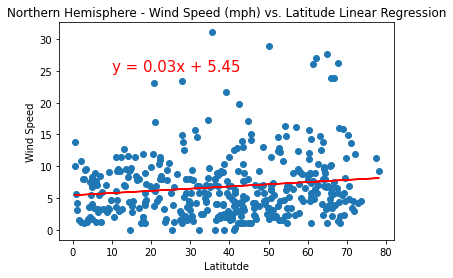

<Figure size 216x432 with 0 Axes>

In [253]:
x_axis=northern_df['Lat']
y_axis=northern_df['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitutde')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
# print(f"The r-squared is: {rvalue**2}")
plt.show()

fig = plt.figure(figsize=(3, 6))
fig.savefig('../output_data/Northern_windspeed', dpi=fig.dpi)


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06428078420172614


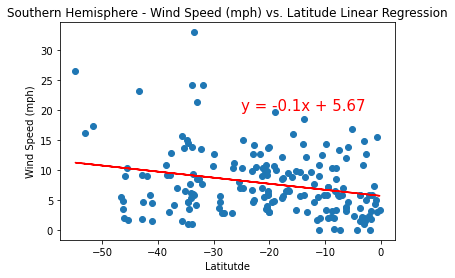

<Figure size 432x288 with 0 Axes>

In [254]:
x_axis=southern_df['Lat']
y_axis=southern_df['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitutde')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../output_data/linregress_southern_wind_plot.jpeg')

In [ ]:
# Observations

# More humidity closer to the equator
# The closer to the arctic circle, the colder it gets temperature wise
#  There is no accurate way to predict cloudiness